<a href="https://colab.research.google.com/github/ozguevara/cbutp/blob/main/myFirst.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_gaussian_quantiles

In [ ]:
N = 1000
gaussian_quantiles = make_gaussian_quantiles(mean=None,
                                             cov=0.1,
                                             n_samples = N,
                                             n_features = 2,
                                             n_classes = 2,
                                             shuffle = True,
                                             random_state=None)

X, Y = gaussian_quantiles

In [ ]:
Y = Y[:, np.newaxis]

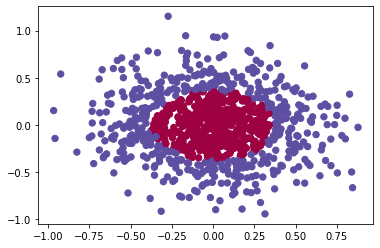

In [ ]:
plt.scatter(X[:,0], X[:,1], c=Y[:,0], s=40, cmap=plt.cm.Spectral)

Funciones de activación y función de perdida

In [ ]:
def sigmoid(a, derivate=False):
  if derivate:
    return np.exp(-x)/((np.exp(-x)+1)**2)
  else:
    return 1 / (1+np.exp(-a))

def relu(x, derivate = False):
  if derivate:
    x[x<=0] = 0
    x[x>0] = 1
    return x
  else:
    return np.maximum(0,x)

def mse(y,y_hat, derivate=False):
  if derivate:
    return (y_hat - y)
  else:
    return np.mean((y_hat - y)**2)

In [ ]:
# Estructura de la red neuronal, con estructura y pesos
def init_parameter(layer_dim):
  parameters = {}
  L = len(layer_dim)
  for l in range(0, L-1):
    parameters['W'+str(l-1)] = (np.random.rand(layer_dim[l], layer_dim[l+1])*2) - 1
    parameters['b'+str(l-1)] = (np.random.rand(1, layer_dim[l+1])*2) - 1
  return parameters


In [ ]:
(np.random.rand(10,3) * 2) - 1

array([[-0.6828015 , -0.30356702, -0.86174233],
       [-0.53997551,  0.77220295,  0.70317709],
       [-0.69984503, -0.67841566,  0.26126931],
       [-0.866488  , -0.17246325, -0.12144272],
       [ 0.74290693,  0.20569535, -0.85018104],
       [-0.34853619,  0.28116492,  0.19993738],
       [ 0.96939228,  0.08641702,  0.06616436],
       [-0.18763919, -0.43446559,  0.71747806],
       [ 0.57507246,  0.30384964, -0.06775439],
       [ 0.68835338, -0.10627387, -0.7651741 ]])

In [ ]:
layer_dims = [2,4,8,1]
params = init_parameter(layer_dims)
params

{'W-1': array([[ 0.85790637, -0.35325643,  0.39927642, -0.91317709],
        [-0.36768705, -0.00389379,  0.86932153,  0.35141714]]),
 'W0': array([[ 0.11723378, -0.3926714 , -0.95859258,  0.22720812,  0.63083964,
         -0.51735837,  0.71843328,  0.5636975 ],
        [ 0.484901  ,  0.61451727,  0.36029135, -0.04498021, -0.04290121,
          0.02767475, -0.39276095, -0.18556205],
        [ 0.91384713,  0.59102914, -0.19979423, -0.03422766,  0.14126153,
          0.32356194,  0.11592492,  0.85343724],
        [-0.15780873,  0.79641151,  0.37253846,  0.24204611, -0.17507085,
         -0.85225904, -0.96288093,  0.51408901]]),
 'W1': array([[-0.35954338],
        [ 0.40640656],
        [ 0.5867679 ],
        [-0.60070574],
        [ 0.37047021],
        [ 0.62162275],
        [ 0.47764596],
        [ 0.28196368]]),
 'b-1': array([[ 0.28468523,  0.44014956, -0.33222611, -0.35386347]]),
 'b0': array([[-0.45816886,  0.40890806, -0.46544726,  0.56762734,  0.25436045,
          0.91235986, -0